# Principal Component Analysis

## import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [3]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

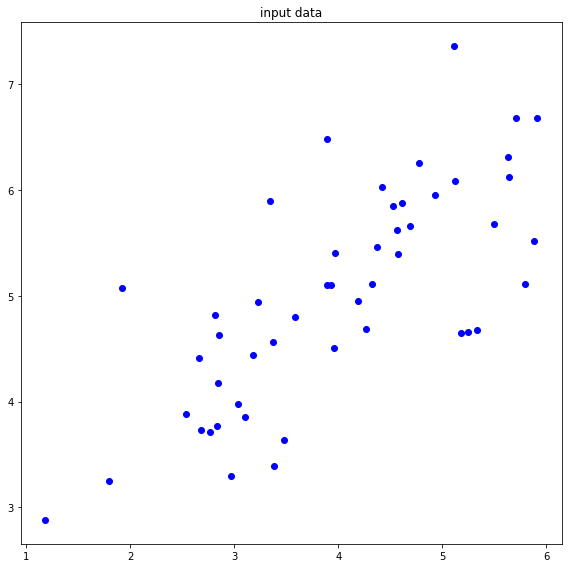

In [4]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [5]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    mean = np.mean(feature,axis=0)
    std = np.std(feature0,axis=0)

    feature_normalize = (feature - mean)/std

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [64]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [7]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    n = feature.shape[0]
    Sigma = np.divide(np.matmul(feature.T,feature),n)


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [37]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Sigma = compute_covariance(feature)
    
    w, v = np.linalg.eig(Sigma)

    w = w[w.argsort()[::-1]]
    v = v[:,w.argsort()[::-1]]
    
    principal_component_1 = w[0]*v[:,0]
    principal_component_2 = w[1]*v[:,1]



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [142]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    n = feature.shape[0]
    projection=np.zeros((n,2))

    for i in range(n):
        point = feature[i,:]
        proj_point = np.dot(vector,point)/np.dot(vector,vector)*vector

        projection[i]=proj_point
    
    



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++


    return projection 



## compute the principal components and the projection of feature

In [143]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

---

---

## functions for presenting the results

---

---

In [45]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

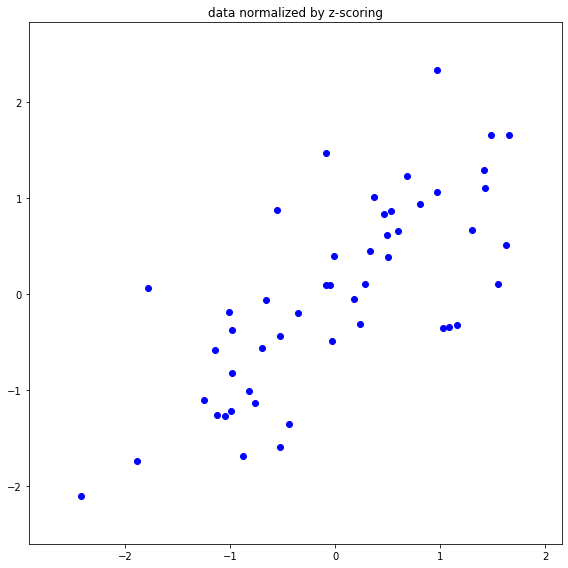

In [46]:
function_result_01()

In [121]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    (principal_component_1, principal_component_2) = compute_principal_component(feature)
    
    plt.arrow(0, 0, principal_component_1[0], principal_component_1[1], head_width = .1, head_length = .2, color = 'red')
    plt.arrow(0, 0, principal_component_2[0], principal_component_2[1], head_width = .1, head_length = .2, color = 'green')
    plt.scatter(x, y, color='blue')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

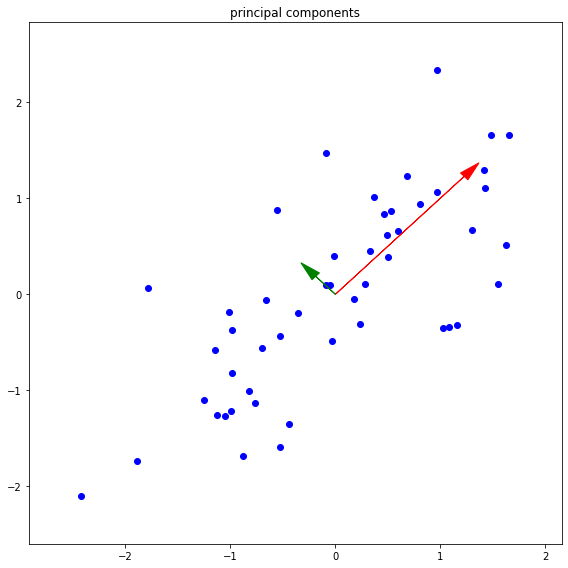

In [122]:
function_result_02()

In [123]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    (principal_component_1, principal_component_2) = compute_principal_component(feature)

    
    X = np.arange(-3,3,0.1)

    Y = (principal_component_1[1]/principal_component_1[0])*X

    plt.plot(X,Y,'-',color='red')
    plt.scatter(x, y, color='blue')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

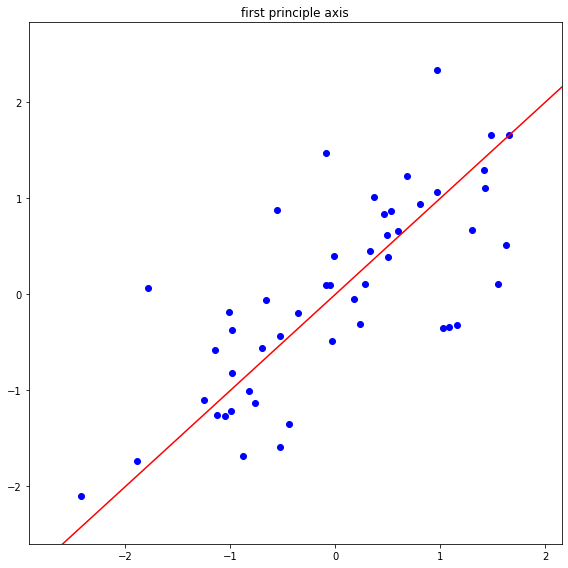

In [68]:
function_result_03()

In [124]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    (principal_component_1, principal_component_2) = compute_principal_component(feature)

    
    X = np.arange(-3,3,0.1)

    Y = (principal_component_2[1]/principal_component_2[0])*X

    plt.plot(X,Y,'-',color='red')
    plt.scatter(x, y, color='blue')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

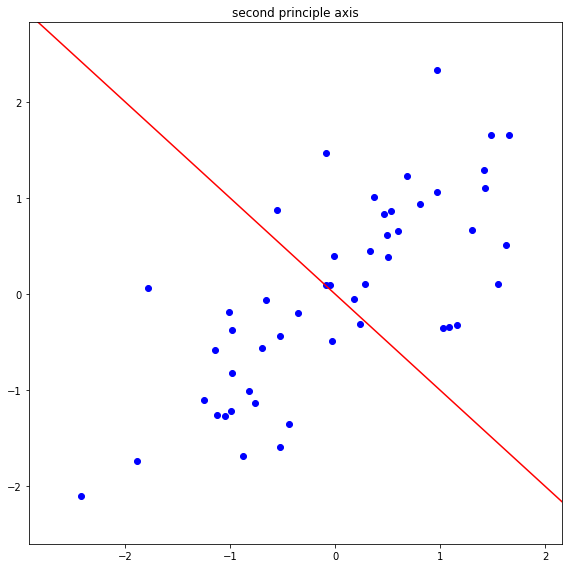

In [125]:
function_result_04()

In [144]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    (principal_component_1, principal_component_2) = compute_principal_component(feature)

    
    X = np.arange(-3,3,0.1)

    Y = (principal_component_1[1]/principal_component_1[0])*X
    

    plt.plot(X,Y,'-',color='red')
    plt.plot(projection1[:,0],projection1[:,1],'o',color='green')
    plt.scatter(x, y, color='blue')
    



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


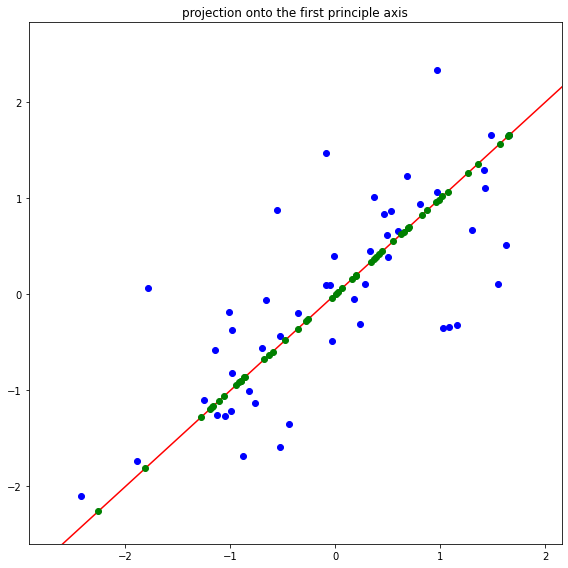

In [145]:
function_result_05()

In [149]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    (principal_component_1, principal_component_2) = compute_principal_component(feature)

    
    X = np.arange(-3,3,0.1)

    Y = (principal_component_2[1]/principal_component_2[0])*X
    plt.plot(X,Y,'-',color='red')
    plt.plot(projection2[:,1],projection2[:,0],'o',color='green')
    plt.scatter(x, y, color='blue')



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

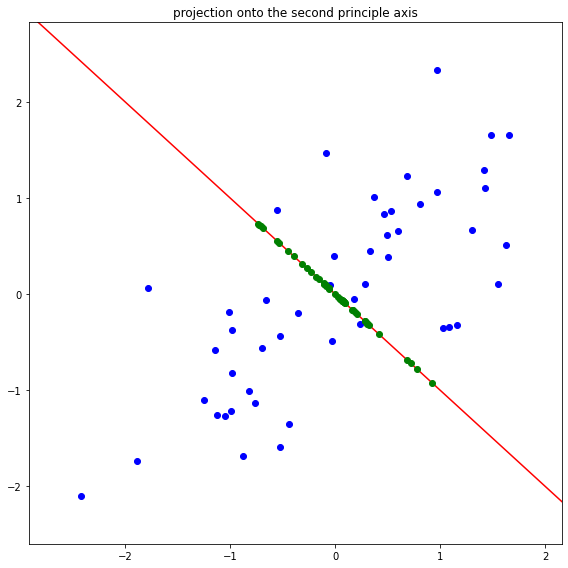

In [150]:
function_result_06()

In [167]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    (principal_component_1, principal_component_2) = compute_principal_component(feature)

    n = feature.shape[0]

    
    X = np.arange(-3,3,0.1)

    Y = (principal_component_1[1]/principal_component_1[0])*X
    

    plt.plot(X,Y,'-',color='red')
    plt.plot(projection1[:,0],projection1[:,1],'o',color='green')
    plt.scatter(x, y, color='blue')

    for i in range(n):
        x_line=[x[i],projection1[i,0]]
        y_line=[y[i],projection1[i,1]]
        plt.plot(x_line,y_line,'-',color='black',alpha=0.3)



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

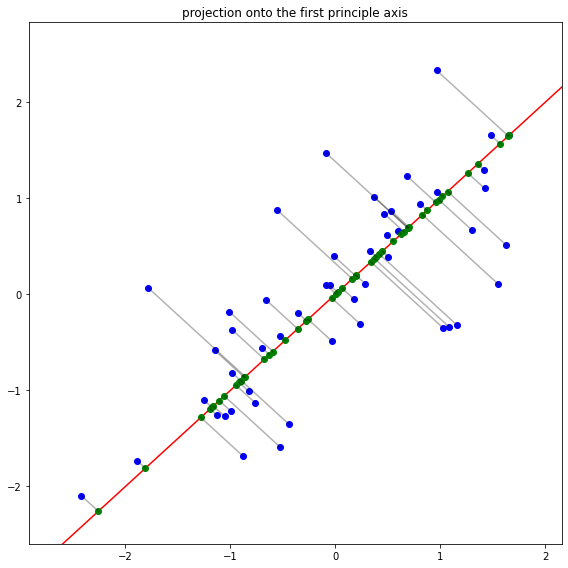

In [168]:
function_result_07()

In [172]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    (principal_component_1, principal_component_2) = compute_principal_component(feature)

    n = feature.shape[0]
    X = np.arange(-3,3,0.1)

    Y = (principal_component_2[1]/principal_component_2[0])*X
    plt.plot(X,Y,'-',color='red')
    plt.plot(projection2[:,1],projection2[:,0],'o',color='green')
    plt.scatter(x, y, color='blue')


    for i in range(n):
        x_line2=[x[i],projection2[i,0]]
        y_line2=[y[i],projection2[i,1]]
        plt.plot(x_line2,y_line2,'-',color='black',alpha=0.3)



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


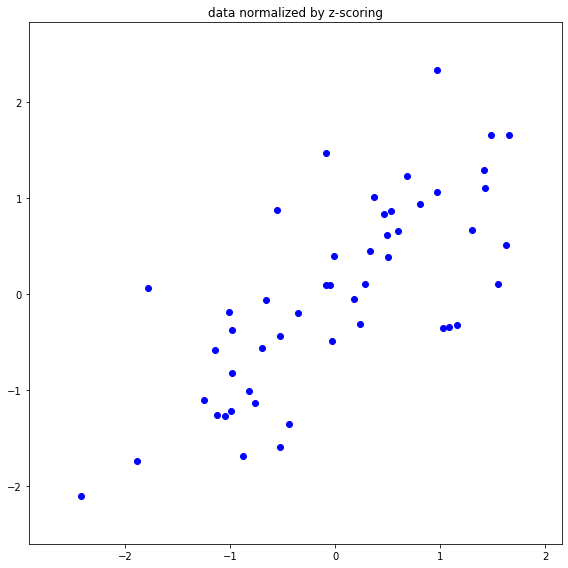

**************************************************
## [RESULT 02]
**************************************************


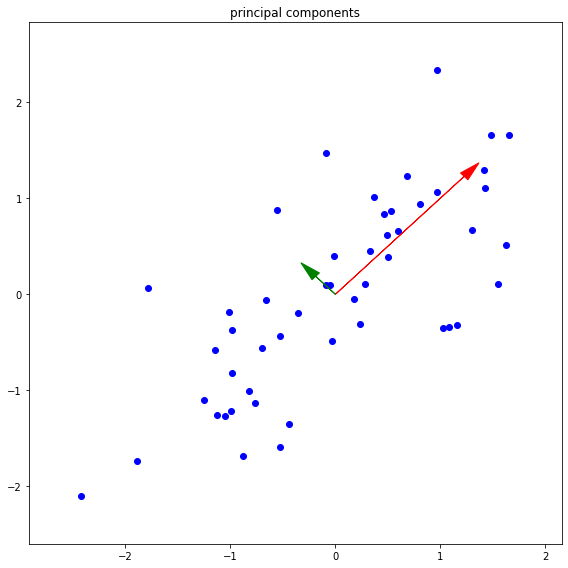

**************************************************
## [RESULT 03]
**************************************************


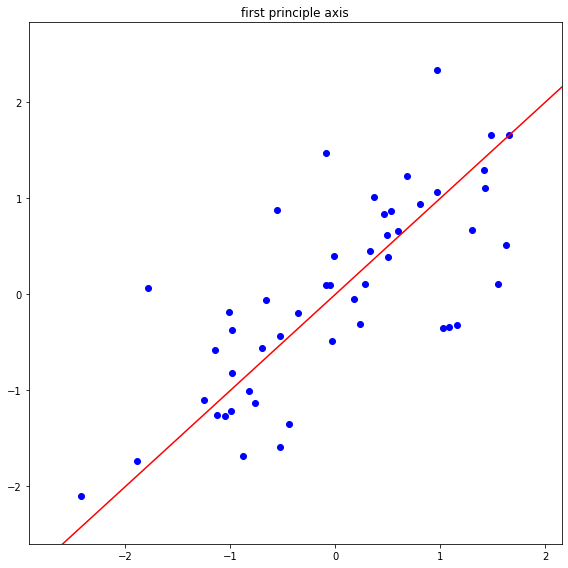

**************************************************
## [RESULT 04]
**************************************************


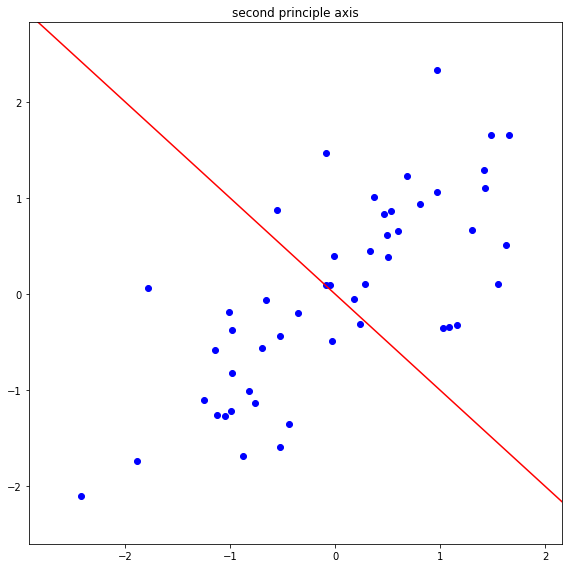

**************************************************
## [RESULT 05]
**************************************************


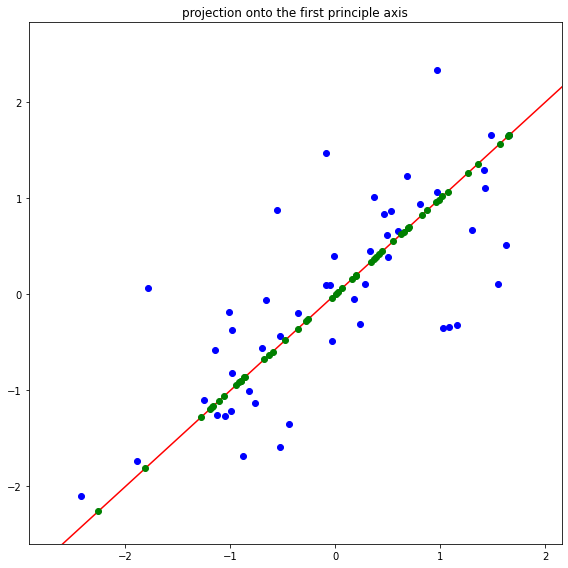

**************************************************
## [RESULT 06]
**************************************************


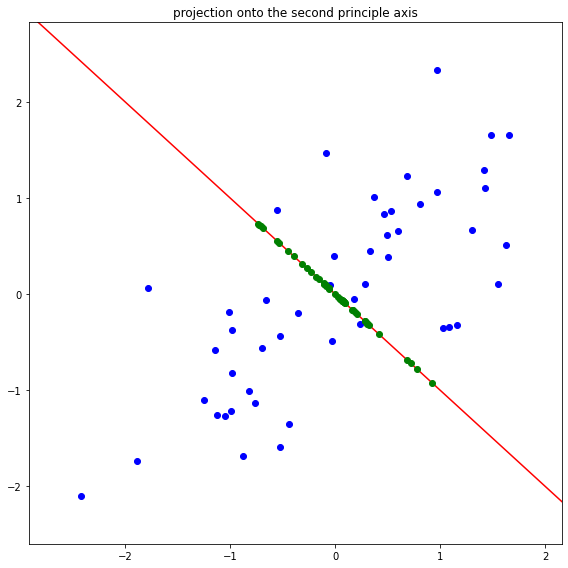

**************************************************
## [RESULT 07]
**************************************************


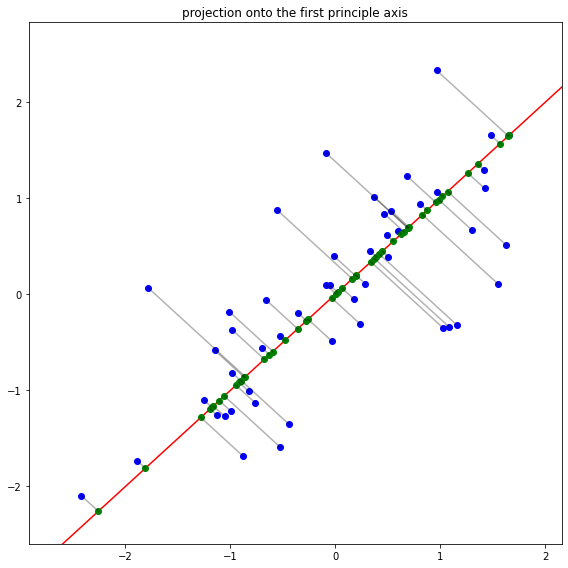

**************************************************
## [RESULT 08]
**************************************************


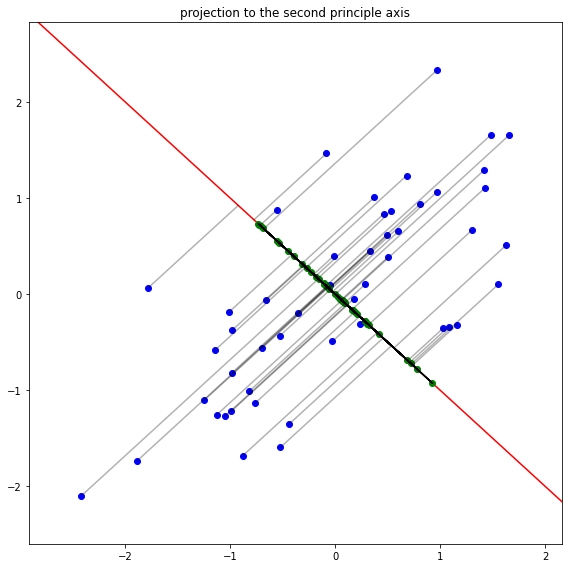

In [171]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)